In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    ''' Funzione di cui si vuole calcolare lo zero'''
    return np.sin(x**2+2*x)-2*x**2+2

In [3]:
x=np.arange(-10,10,0.5)
y=f(x)

In [4]:
def trova_zeri(x,y):
    ''' Trova gli intervalli che contengono gli zeri della funzione'''
    zeri=[]
    for i in range(len(x)-1):
        if y[i]*y[i+1]<0:
            zeri.append([x[i],x[i+1]])
    return zeri

In [5]:
intervalli_zeri=trova_zeri(x,y)
intervallo1=intervalli_zeri[0]
intervallo2=intervalli_zeri[1]
print("Gli zeri della funzione sono compresi negli intervalli: ",intervalli_zeri)

Gli zeri della funzione sono compresi negli intervalli:  [[-1.0, -0.5], [1.0, 1.5]]


In [6]:
def bisection(f,a,b,N,tolerance=0.0001):
    ''' 
    Metodo di bisezione per trovare lo zero della funzione f
    nell'intervallo [a,b] con N iterazioni.
    tolerance è la tolleranza per la quale si considera lo zero trovato.
    '''
   
    if f(a)*f(b) >= 0:
        print("Nessuna soluzione con il merodo di bisezione.")
        return None
    a_n = a
    b_n = b
    n=0
    while n<N:
        m_n = (a_n + b_n)/2
        f_m_n = f(m_n)
        if f(a_n)*f_m_n < 0:
            a_n = a_n
            b_n = m_n
        elif f(b_n)*f_m_n < 0:
            a_n = m_n
            b_n = b_n
        elif f_m_n < tolerance:
            print("Solzione trovata dopo",n,"iterazioni.")
            return m_n
        else:
            print("Nessuna soluzione.")
            return None
        n=n+1
    return (a_n + b_n)/2



In [7]:
bisection(f,intervallo1[0],intervallo1[1],100,tolerance=1e-10)

Solzione trovata dopo 51 iterazioni.


-0.7707388236988614

In [8]:
bisection(f,intervallo2[0],intervallo2[1],10)

1.017333984375

In [9]:
def df(x):
    return np.cos(x**2+2*x)*(2*x+2)-4*x

In [10]:
def newton(f,df,x0,tolerance=0.0001):
    ''' 
    Metodo di Newton per trovare lo zero della funzione f
    df è la derivata di f
    x0 è il punto di partenza
    tolerance è la tolleranza per la quale si considera lo zero trovato
    '''
    delta=abs(f(x0)/df(x0))
    while delta>tolerance:
        delta=abs(f(x0)/df(x0))
        x0=x0-f(x0)/df(x0)
    return x0


In [11]:
newton(f,df,intervallo1[0],tolerance=1e-10)

-0.7707388236988614

In [12]:
newton(f,df,intervallo2[0],tolerance=1e-6)

1.0175757925334004

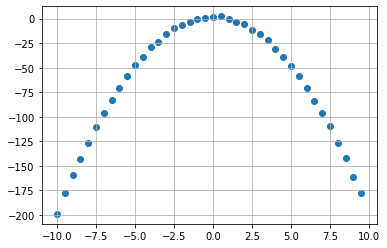

In [13]:
plt.scatter(x,y)
plt.grid( )

# plt.xlim(-2,0)
# plt.ylim(-1,1)
# plt.hlines(0,-10,10)
# plt.vlines(0,-200,200)
plt.show()

In [1]:
def recursive_bisection(f,left,right,tolerance=1e-10):
    ''' 
    Metodo di bisezione ricorsivo per trovare lo zero della funzione f
    nell'intervallo [a,b] 
    tolerance è la tolleranza per la quale si considera lo zero trovato.
    '''
    m=(left+right)/2
    if abs(f(m))<tolerance:
        return m
    elif f(m)*f(left)<0:
        return recursive_bisection(f,left,m,tolerance)
    else:
        return recursive_bisection(f,m,right,tolerance)

In [ ]:
recursive_bisection(f,intervallo1[0],intervallo1[1],tolerance=1e-3)